In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/epoch50/model_weights_epoch_50.weights.h5
/kaggle/input/lipnetfinalweights/model_weights_final.weights.h5
/kaggle/input/lipreadingdataset/data/s1/bwam9s.mpg
/kaggle/input/lipreadingdataset/data/s1/lgbm4p.mpg
/kaggle/input/lipreadingdataset/data/s1/bbizzn.mpg
/kaggle/input/lipreadingdataset/data/s1/srwo6n.mpg
/kaggle/input/lipreadingdataset/data/s1/bgbu3s.mpg
/kaggle/input/lipreadingdataset/data/s1/pwax6p.mpg
/kaggle/input/lipreadingdataset/data/s1/srwb8n.mpg
/kaggle/input/lipreadingdataset/data/s1/sgic1a.mpg
/kaggle/input/lipreadingdataset/data/s1/sgbp6p.mpg
/kaggle/input/lipreadingdataset/data/s1/sbwo2p.mpg
/kaggle/input/lipreadingdataset/data/s1/srit9s.mpg
/kaggle/input/lipreadingdataset/data/s1/sgio6n.mpg
/kaggle/input/lipreadingdataset/data/s1/srah6p.mpg
/kaggle/input/lipreadingdataset/data/s1/prip2p.mpg
/kaggle/input/lipreadingdataset/data/s1/sbinzp.mpg
/kaggle/input/lipreadingdataset/data/s1/bgaa6n.mpg
/kaggle/input/lipreadingdataset/data/s1/pgak2n.mpg
/kaggle/input

In [2]:
import gdown

In [3]:
!pip list

Package                          Version               Editable project location
-------------------------------- --------------------- -------------------------
absl-py                          1.4.0
accelerate                       0.34.2
aiofiles                         22.1.0
aiohappyeyeballs                 2.4.0
aiohttp                          3.10.5
aiosignal                        1.3.1
aiosqlite                        0.20.0
alabaster                        0.7.16
albucore                         0.0.16
albumentations                   1.4.15
alembic                          1.14.0
altair                           5.5.0
annotated-types                  0.7.0
annoy                            1.17.3
ansicolors                       1.1.8
antlr4-python3-runtime           4.9.3
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
args                             0.1.0
array_record                     0.5.1
arrow   

In [4]:
url = 'https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL'
output = 'data.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('data.zip')

Downloading...
From (original): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL
From (redirected): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL&confirm=t&uuid=033fb50c-b824-4bbb-a483-43d51b4d0e4a
To: /kaggle/working/data.zip
100%|██████████| 423M/423M [00:03<00:00, 121MB/s]


['data/',
 'data/alignments/',
 'data/alignments/s1/',
 'data/alignments/s1/bbaf2n.align',
 'data/alignments/s1/bbaf3s.align',
 'data/alignments/s1/bbaf4p.align',
 'data/alignments/s1/bbaf5a.align',
 'data/alignments/s1/bbal6n.align',
 'data/alignments/s1/bbal7s.align',
 'data/alignments/s1/bbal8p.align',
 'data/alignments/s1/bbal9a.align',
 'data/alignments/s1/bbas1s.align',
 'data/alignments/s1/bbas2p.align',
 'data/alignments/s1/bbas3a.align',
 'data/alignments/s1/bbaszn.align',
 'data/alignments/s1/bbaz4n.align',
 'data/alignments/s1/bbaz5s.align',
 'data/alignments/s1/bbaz6p.align',
 'data/alignments/s1/bbaz7a.align',
 'data/alignments/s1/bbbf6n.align',
 'data/alignments/s1/bbbf7s.align',
 'data/alignments/s1/bbbf8p.align',
 'data/alignments/s1/bbbf9a.align',
 'data/alignments/s1/bbbm1s.align',
 'data/alignments/s1/bbbm2p.align',
 'data/alignments/s1/bbbm3a.align',
 'data/alignments/s1/bbbmzn.align',
 'data/alignments/s1/bbbs4n.align',
 'data/alignments/s1/bbbs5s.align',
 'data/al

In [5]:
!pip install opencv-python matplotlib imageio  tensorflow

In [6]:
import os

# Path to the 's1' directory inside the Kaggle dataset
dataset_dir = "/kaggle/input/lipreadingdataset/data/s1"

# List contents of the 's1' directory
if os.path.exists(dataset_dir):
    print("Contents of 's1' directory:", os.listdir(dataset_dir))
else:
    print(f"The directory {dataset_dir} does not exist.")


Contents of 's1' directory: ['bwam9s.mpg', 'lgbm4p.mpg', 'bbizzn.mpg', 'srwo6n.mpg', 'bgbu3s.mpg', 'pwax6p.mpg', 'srwb8n.mpg', 'sgic1a.mpg', 'sgbp6p.mpg', 'sbwo2p.mpg', 'srit9s.mpg', 'sgio6n.mpg', 'srah6p.mpg', 'prip2p.mpg', 'sbinzp.mpg', 'bgaa6n.mpg', 'pgak2n.mpg', 'pgwe7s.mpg', 'bgit7a.mpg', 'pbwp6n.mpg', 'bgwb4n.mpg', 'swbczn.mpg', 'lrbe8p.mpg', 'priv6p.mpg', 'bwbg8n.mpg', 'sbbbzp.mpg', 'swwc5s.mpg', 'pwbq5s.mpg', 'pbwd1a.mpg', 'bwbt7s.mpg', 'sgio8p.mpg', 'sbbn9a.mpg', 'srih2p.mpg', 'swio2p.mpg', 'lbwe5s.mpg', 'pbbc5s.mpg', 'lgbm3s.mpg', 'lbby2n.mpg', 'lbak2p.mpg', 'pwad3s.mpg', 'lbwe7a.mpg', 'pgiq4p.mpg', 'pgwzzp.mpg', 'sgav7a.mpg', 'sgwd3a.mpg', 'pbao8n.mpg', 'pgay2p.mpg', 'lgaz8p.mpg', 'bbir9a.mpg', 'prwq5a.mpg', 'prwq4p.mpg', 'bwba6p.mpg', 'pwbk3a.mpg', 'lwbs3a.mpg', 'brbm9a.mpg', 'bgia4p.mpg', 'pric5a.mpg', 'bram2n.mpg', 'lgbf9s.mpg', 'lgwg3s.mpg', 'prac6n.mpg', 'lwwf8p.mpg', 'pgwe6n.mpg', 'lrar3a.mpg', 'sbwh9a.mpg', 'swwv8p.mpg', 'bgahzn.mpg', 'pwax7a.mpg', 'sgai6n.mpg', 'pgwl

In [7]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio

In [8]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [9]:
def load_video(path:str) -> List[float]: 

    cap = cv2.VideoCapture(path)
    frames = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))): 
        ret, frame = cap.read()
        frame = tf.image.rgb_to_grayscale(frame)
        frames.append(frame[190:236,80:220,:])
    cap.release()
    
    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    return tf.cast((frames - mean), tf.float32) / std

In [10]:
vocab


['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [11]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)


    

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' '] (size =40)


In [12]:

output=char_to_num(['v','i','s','a','s','h',])
print('the numeric representation is',output)

the numeric representation is tf.Tensor([22  9 19  1 19  8], shape=(6,), dtype=int64)


In [13]:
num_to_char([22 , 9, 19,  1, 19,  8])

<tf.Tensor: shape=(6,), dtype=string, numpy=array([b'v', b'i', b's', b'a', b's', b'h'], dtype=object)>

In [14]:
def load_alignments(path:str) -> List[str]: 
    with open(path, 'r') as f: 
        lines = f.readlines() 
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil': 
            tokens = [*tokens,' ',line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]

In [15]:
def load_data(path: str): 
    path = bytes.decode(path.numpy())
    file_name = path.split('/')[-1].split('.')[0]
    video_path = os.path.join('data','s1',f'{file_name}.mpg')
    alignment_path = os.path.join('data','alignments','s1',f'{file_name}.align')
    frames = load_video(video_path) 
    alignments = load_alignments(alignment_path)
    
    return frames, alignments

In [16]:
test_path = './data/s1/bbbf9a.mpg'


^tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('/')[-1].split('.')[0]

In [17]:
frames, alignments = load_data(tf.convert_to_tensor(test_path))

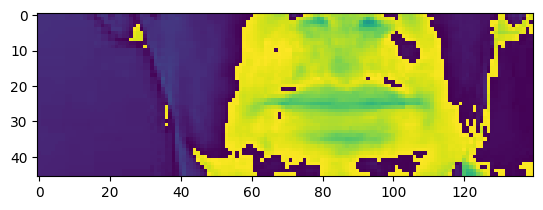

In [18]:
plt.imshow(frames[74])

In [19]:
alignments

<tf.Tensor: shape=(24,), dtype=int64, numpy=
array([ 2,  9, 14, 39,  2, 12, 21,  5, 39,  2, 25, 39,  6, 39, 14,  9, 14,
        5, 39,  1,  7,  1,  9, 14])>

In [20]:
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue by f nine again'>

In [21]:
def mappable_function(path:str) ->List[str]:
    result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
    return result
    

In [22]:
data = tf.data.Dataset.list_files('./data/s1/*.mpg')
data = data.shuffle(500, reshuffle_each_iteration=False)
data = data.map(mappable_function)
data = data.padded_batch(2, padded_shapes=([75,None,None,None],[40]))
data = data.prefetch(tf.data.AUTOTUNE)
# Added for split 
train = data.take(450)
test = data.skip(450)

In [23]:
len(test)

50

In [24]:
frames, alignments = data.as_numpy_iterator().next()

In [25]:
sample = data.as_numpy_iterator()

In [26]:
val = sample.next(); val[0]

array([[[[[1.5953392 ],
          [1.5211374 ],
          [1.4840364 ],
          ...,
          [0.40811002],
          [0.3710091 ],
          [0.3710091 ]],

         [[1.5211374 ],
          [1.3356328 ],
          [1.4840364 ],
          ...,
          [0.40811002],
          [0.3710091 ],
          [0.3710091 ]],

         [[1.5211374 ],
          [1.5211374 ],
          [1.5211374 ],
          ...,
          [0.3339082 ],
          [0.3339082 ],
          [0.3339082 ]],

         ...,

         [[1.1130273 ],
          [1.0388255 ],
          [1.0388255 ],
          ...,
          [0.07420182],
          [0.07420182],
          [0.07420182]],

         [[1.0388255 ],
          [1.0388255 ],
          [1.0388255 ],
          ...,
          [0.07420182],
          [0.07420182],
          [0.07420182]],

         [[1.0388255 ],
          [1.0388255 ],
          [1.0388255 ],
          ...,
          [0.07420182],
          [0.07420182],
          [0.03710091]]],


        [[[1.5211

In [27]:
sample = data.as_numpy_iterator()
val = sample.next()
fv = (val[0][1].astype(np.uint8) * 255).squeeze()
imageio.mimsave('./animation.gif', fv, duration=100)

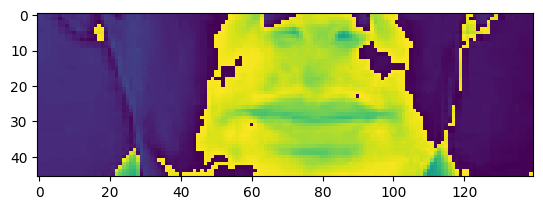

In [28]:
plt.imshow(val[0][0][73])

In [29]:
tf.strings.reduce_join([num_to_char(word) for word in val[1][0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'set white at o five soon'>

In [30]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [31]:
data.as_numpy_iterator().next()[0][1].shape

(75, 46, 140, 1)

In [32]:
from keras.models import Sequential
from keras.layers import Conv3D, MaxPool3D, Activation, Reshape, Bidirectional, LSTM, Dropout, Dense, Input

model = Sequential()

# Input layer
model.add(Input(shape=(75, 46, 140, 1)))

# Conv3D layers
model.add(Conv3D(128, 3, padding='same', activation='relu'))
model.add(MaxPool3D((1, 2, 2)))

model.add(Conv3D(256, 3, padding='same', activation='relu'))
model.add(MaxPool3D((1, 2, 2)))

model.add(Conv3D(75, 3, padding='same', activation='relu'))
model.add(MaxPool3D((1, 2, 2)))

# Explicit reshape instead of TimeDistributed(Flatten())
model.add(Reshape((75, -1)))  # 75 time steps, flattened feature dimension

# Bidirectional LSTMs
model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(0.5))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(0.5))

# Dense output layer
model.add(Dense(char_to_num.vocabulary_size() + 1, kernel_initializer='he_normal', activation='softmax'))


In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv3d (Conv3D)                      │ (None, 75, 46, 140, 128)    │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d (MaxPooling3D)         │ (None, 75, 23, 70, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_1 (Conv3D)                    │ (None, 75, 23, 70, 256)     │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_1 (MaxPooling3D)       │ (None, 75, 11, 35, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_2 (Conv3D)                    │ (None, 75, 11, 35, 75)      │         518,475 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_2 (MaxPooling3D)       │ (None, 75, 5, 17, 75)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 75, 6375)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 75, 256)             │       6,660,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 75, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 75, 256)             │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 75, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 75, 41)              │          10,537 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,471,924 (32.32 MB)

 Trainable params: 8,471,924 (32.32 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
5*17*75

6375

In [35]:
yhat = model.predict(val[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [36]:
tf.strings.reduce_join([num_to_char(x) for x in tf.argmax(yhat[0],axis=1)])


<tf.Tensor: shape=(), dtype=string, numpy=b'ddddddddhhhhhhhhhhhhhhrrrrrhhhhhhhrrrrrrrrrrrrrrrrhrhhhhhhhhrrrrrrrrrrrrrrr'>

In [37]:
tf.strings.reduce_join([num_to_char(tf.argmax(x)) for x in yhat[0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'ddddddddhhhhhhhhhhhhhhrrrrrhhhhhhhrrrrrrrrrrrrrrrrhrhhhhhhhhrrrrrrrrrrrrrrr'>

In [38]:
model.input_shape

(None, 75, 46, 140, 1)

In [39]:
model.output_shape

(None, 75, 41)

In [40]:
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * float(tf.math.exp(-0.1))

In [41]:
def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [42]:

class ProduceExample(tf.keras.callbacks.Callback): 
    def __init__(self, dataset) -> None: 
        self.dataset = dataset.as_numpy_iterator()
    
    def on_epoch_end(self, epoch, logs=None) -> None:
        data = self.dataset.next()
        yhat = self.model.predict(data[0])
        decoded = tf.keras.backend.ctc_decode(yhat, [75,75], greedy=False)[0][0].numpy()
        for x in range(len(yhat)):           
            print('Original:', tf.strings.reduce_join(num_to_char(data[1][x])).numpy().decode('utf-8'))
            print('Prediction:', tf.strings.reduce_join(num_to_char(decoded[x])).numpy().decode('utf-8'))
            print('~'*100)

In [43]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss=CTCLoss)

In [44]:
from keras.callbacks import ModelCheckpoint
import os

# Define the checkpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join('models', 'checkpoint.weights.h5'),  # Add .weights.h5 extension
    monitor='loss',
    save_weights_only=True
)


In [45]:
schedule_callback = LearningRateScheduler(scheduler)

In [46]:
example_callback = ProduceExample(test)

In [47]:
model.load_weights('/kaggle/input/lipnetfinalweights/model_weights_final.weights.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 42 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [48]:
#model.save_weights('model_weights_final_105.weights.h5')

In [49]:
test_data = test.as_numpy_iterator()

In [50]:
sample = test_data.next()

In [51]:
yhat = model.predict(sample[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step


In [52]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in sample[1]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'set white in o three again'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'set green by c six now'>]

In [53]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75,75], greedy=True)[0][0].numpy()

In [54]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'set white in o three again'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'set green by c six now'>]